ผลลัพธ์จากโมเดล: Lasso
R-squared: 0.9940
RMSE: 21035.73


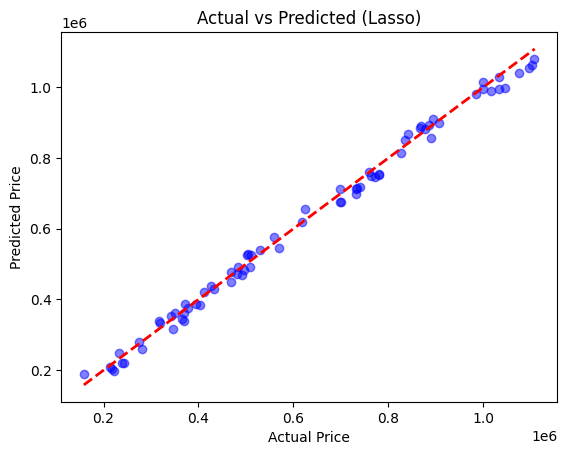

In [50]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# --- [จุดเปลี่ยนที่ 1: Import โมเดลที่ต้องการ] ---
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# 1. เตรียมข้อมูล
data = pd.read_csv("../data/cleaned_house_sale.csv")
X = data[["area", "colB", "colC", "house_age", "zone_rating"]]
y = data["price_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling (สำคัญมากสำหรับ Lasso และ Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- [จุดเปลี่ยนที่ 2: เลือกโมเดลตามรูปภาพ] ---
# เลือกใช้เพียงบรรทัดเดียวโดยการเอา # ออก

# แบบที่ 1: Linear Regression (พื้นฐานที่สุด)
# model = LinearRegression()

# แบบที่ 2: Lasso Regression (ใส่ Penalty แบบ L1 - ช่วยตัด Feature ที่ไม่สำคัญ)

model = Lasso(
    alpha=0.01,            # ค่าความแรงของ L1 penalty (ยิ่งมาก → ตัด feature มาก)
    max_iter=100000,       # จำนวนรอบสูงสุดในการ optimize
    random_state=42       # ควบคุมความสุ่ม (มีผลเมื่อ selection เป็น random)
)


# แบบที่ 3: Ridge Regression (ใส่ Penalty แบบ L2 - ช่วยลด Overfitting)
# model = Ridge(
#     alpha=2.0,            # ความแรงของ L2 regularization (ยิ่งมาก → coef ยิ่งถูกลดขนาด)
#     max_iter=100000,        # ใช้ค่า iteration เริ่มต้นของ solver
#     random_state=42       # ควบคุมความสุ่มของบาง solver (เพื่อให้ผลซ้ำได้)
# )

# 3. ฝึกสอนโมเดล
model.fit(X_train_scaled, y_train)

# 4. ทำนายผล
y_pred = model.predict(X_test_scaled)

# 5. แสดงผลลัพธ์
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"ผลลัพธ์จากโมเดล: {type(model).__name__}")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {mse**0.5:.2f}")

# Plot กราฟเปรียบเทียบ
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # เส้น 45 องศา (ทำนายเป๊ะ)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted ({type(model).__name__})")
plt.show()